# Fundamentals of Data Visualization
## Project idea

My project investigates the health care cost in Switzerland and how it relates to a few variables like life expectancy, distribution of the cost and how it is financed or better said who pays the system.

### Basics and chart types

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_cost = pd.read_csv("healthcare_cost.csv",sep=';')
df_cost.columns = ['year', 'cost_M', 'cost_95', 'GDP_M', 'GDP_95', 'cost_%GDP', 'pop_T', 'expend_persmonth', 'cost_inpat%', 'cost_outpat%', 'cost_hproduct%', 'cost_prev%']
df_cost.head()

,year,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,cost_inpat%,cost_outpat%,cost_hproduct%,cost_prev%
0,1960,2 008,5.6,45 096,10.8,4.5,5 362,31,37.8,33.4,24.6,4.2
1,1961,2 131,5.9,50 731,12.1,4.2,5 512,32,39.4,31.5,24.9,4.2
2,1962,2 313,6.4,56 258,13.5,4.1,5 666,34,40.8,30.4,24.6,4.2
3,1963,2 494,6.9,61 863,14.8,4.0,5 789,36,41.2,29.9,24.6,4.3
4,1964,2 758,7.6,68 573,16.4,4.0,5 887,39,42.1,29.4,23.9,4.5


Explanation of the data:
* cost_M: cost in MCHF
* cost_95: cost with Index 1995 = 0
* GDP_M: GDP in MCHF
* GDP_95: GDP with Index 1995 = 0
* cost_%GDP: cost in % of the GDP
* pop_T: Average population in Thousand
* expend_persmonth: Expend per person and month
* cost_inpat%: cost of inpatient in %
* cost_outpat%: cost of outpatient in %
* cost_hproduct%: cost of health products and imports in %
* cost_prev%: cost of prevention and administration in %

Clean the data: cost_M, GDP_M and pop_T are objects because they have spaces.
* replace the spaces
* Change to int

In [3]:
year_cat = pd.cut(df_cost.year, bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020], labels=["1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2020"])
df_cost.insert(2,"year_cat", year_cat)

In [4]:
df_cost.cost_M = df_cost.cost_M.str.replace(" ","")
df_cost.GDP_M = df_cost.GDP_M.str.replace(" ","")
df_cost.pop_T = df_cost.pop_T.str.replace(" ","")
df_cost[["cost_M", "GDP_M", "pop_T"]] = df_cost[["cost_M", "GDP_M", "pop_T"]].astype(str).astype(int)
print(df_cost.dtypes)

year                   int64
cost_M                 int32
year_cat            category
cost_95              float64
GDP_M                  int32
GDP_95               float64
cost_%GDP            float64
pop_T                  int32
expend_persmonth       int64
cost_inpat%          float64
cost_outpat%         float64
cost_hproduct%       float64
cost_prev%           float64
dtype: object


**First question:** How developed the cost of the health care system in Switzerland?

The costs are rising - not linear, but almost exponentially

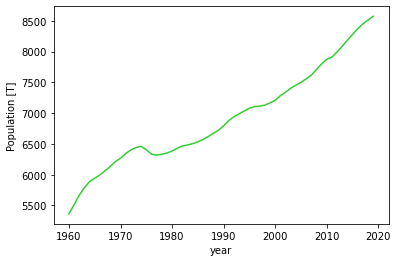

In [5]:
fig,ax = plt.subplots()
ax.plot('year', 'pop_T', data = df_cost, color='limegreen')
ax.set_xlabel('year')
ax.set_ylabel('Population [T]')
fig.savefig('output_pop.png')
plt.show()

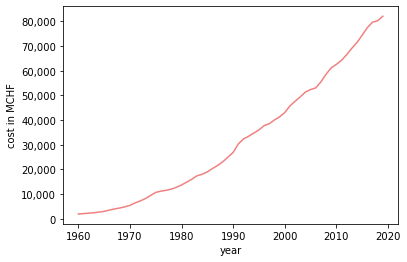

In [6]:
fig,ax = plt.subplots()
ax.plot('year', 'cost_M', data = df_cost, color='lightcoral')
ax.set_xlabel('year')
ax.set_ylabel('cost in MCHF')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Comparison to the GDP:** It looks like the cost and the GDP are rising similarly - so no problem for the rising cost of the health system becuase we are getting richer, or?

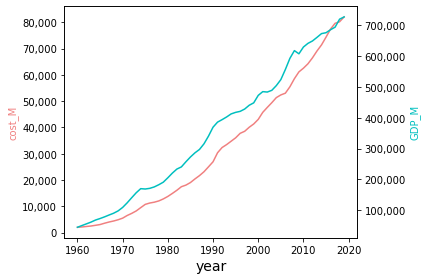

In [7]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_cost.year, df_cost.cost_M, color="lightcoral")
# set x-axis label
ax.set_xlabel('year',fontsize=14)
# set y-axis label
ax.set_ylabel('cost_M',color="lightcoral", fontsize=10)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_cost.year, df_cost.GDP_M, color="c")
ax2.set_ylabel('GDP_M',color="c",fontsize=10)
fig.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

fig.savefig('output_double.png')
plt.show()

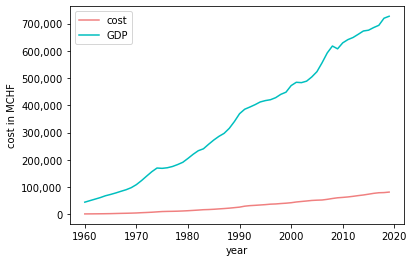

In [8]:
plt.plot('year', 'cost_M', data = df_cost, color='lightcoral', label='cost')
plt.plot('year', 'GDP_M', data = df_cost, color='c', label='GDP')
plt.xlabel('year')
plt.ylabel('cost in MCHF')
plt.legend(loc='best')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('output_10.png')
plt.show()

**BUT!:** The two axis aren't aligned in the plot above, thats why the statement isn't correct. Different axis can mislead the reader. In the following plot you can see that the percentage of the GDP increased for the cost of the healtcare system.

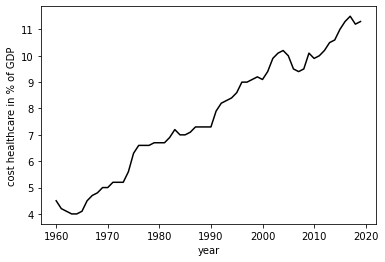

In [9]:
fig,ax = plt.subplots()
ax.plot('year', 'cost_%GDP', data = df_cost, color='black')
ax.set_xlabel('year')
ax.set_ylabel('cost healthcare in % of GDP')
plt.show()

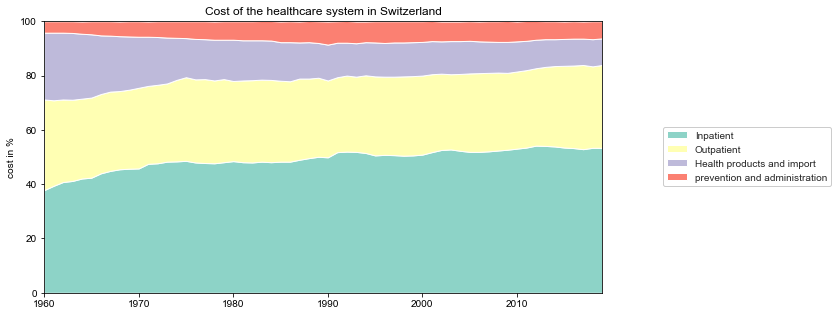

In [11]:
f, ax = plt.subplots(figsize=(10, 5))

sns.set_style('darkgrid')

pal = sns.color_palette("Set3")

ax.stackplot(df_cost["year"], df_cost["cost_inpat%"], df_cost["cost_outpat%"], df_cost["cost_hproduct%"], df_cost["cost_prev%"], 
              labels=['Inpatient','Outpatient','Health products and import', 'prevention and administration'], colors=pal)

ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), facecolor='white', framealpha=1)

ax.margins(0,0)
plt.title('Cost of the healthcare system in Switzerland')
plt.ylabel("cost in %")
plt.show()

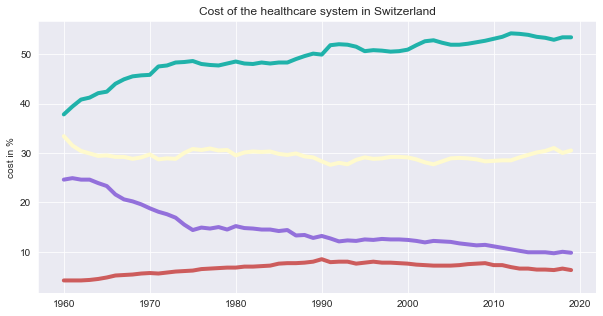

In [12]:
f, ax = plt.subplots(figsize=(10, 5))
sns.set_style('darkgrid')

lines = ax.plot(df_cost["year"], df_cost["cost_inpat%"],df_cost["year"], df_cost["cost_outpat%"], 
        df_cost["year"], df_cost["cost_hproduct%"],df_cost["year"],df_cost["cost_prev%"])

plt.setp(lines[0], color= 'lightseagreen', linewidth=4)
plt.setp(lines[1], color= 'lemonchiffon', linewidth=4)
plt.setp(lines[2], color= 'mediumpurple', linewidth=4)
plt.setp(lines[3], color= 'indianred', linewidth=4)


plt.title('Cost of the healthcare system in Switzerland')
plt.ylabel("cost in %")
plt.show()

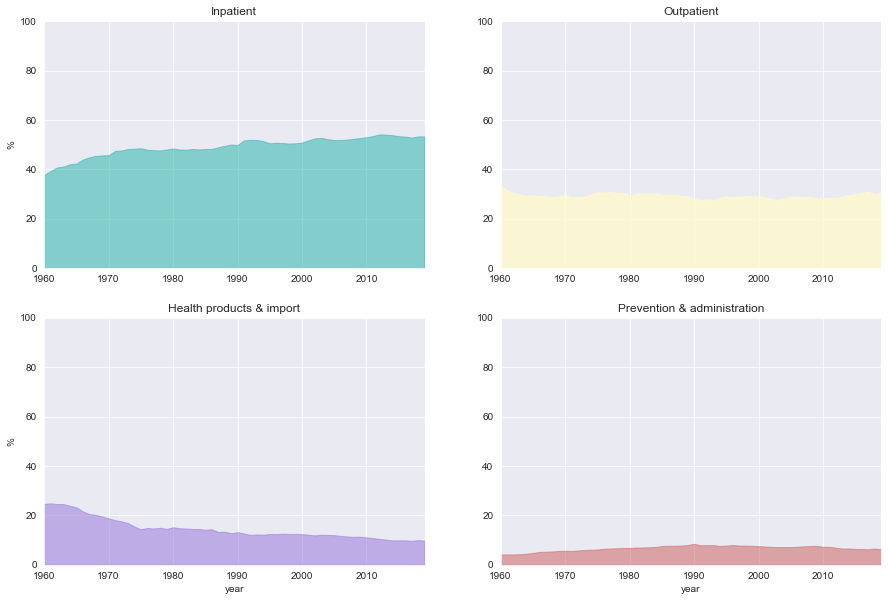

In [14]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
#fig.suptitle('Distribution of costs in Swiss healthcare', fontsize=20)

ax1 = plt.subplot(2, 2, 1)
ax1.stackplot('year', 'cost_inpat%', data = df_cost, alpha=0.5, color='lightseagreen')
ax1.title.set_text('Inpatient')
ax1.set_ylabel('%')
ax1.set_ylim([0,100])
ax1.margins(0,0)


ax2.stackplot('year', 'cost_outpat%', data = df_cost, alpha=0.8, color='lemonchiffon')
#ax2.set_xlabel('year')
#ax2.set_ylabel('%')
ax2.set_ylim([0,100])
ax2.title.set_text('Outpatient')
ax2.margins(0,0)

ax3.stackplot('year', 'cost_hproduct%', data = df_cost, alpha=0.5, color='mediumpurple')
ax3.set_xlabel('year')
ax3.set_ylabel('%')
ax3.set_ylim([0,100])
ax3.title.set_text('Health products & import')
ax3.margins(0,0)

ax4.stackplot('year', 'cost_prev%', data = df_cost, alpha=0.5, color='indianred')
ax4.set_xlabel('year')
#ax4.set_ylabel('%')
ax4.set_ylim([0,100])
ax4.title.set_text('Prevention & administration')
ax4.margins(0,0)

fig.savefig('output_15.png')
plt.show()

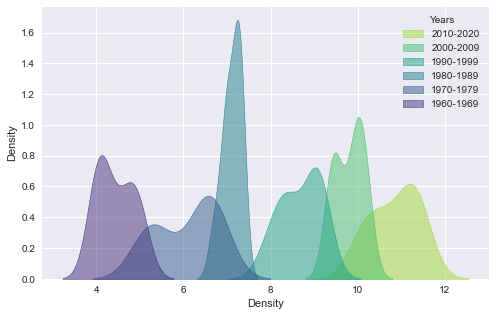

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.kdeplot(
   data=df_cost, x="cost_%GDP", hue="year_cat",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0.5, 
)
ax.set_xlabel("Density")
ax.legend(["2010-2020", "2000-2009", "1990-1999", "1980-1989", "1970-1979", "1960-1969"], title="Years")
fig.savefig('GDP_dev_cat.png')
plt.show()

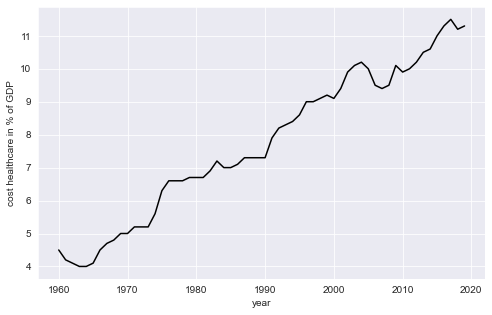

In [17]:
fig,ax = plt.subplots(figsize=(8, 5))
ax.plot('year', 'cost_%GDP', data = df_cost, color='black')
ax.set_xlabel('year')
ax.set_ylabel('cost healthcare in % of GDP')
plt.style.use("seaborn")
fig.savefig('GDP_dev.png')
plt.show()

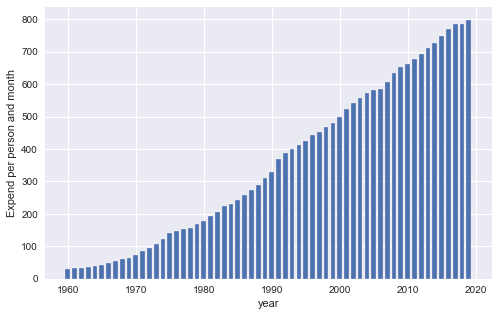

In [39]:
plt.subplots(figsize=(8, 5))
plt.bar(x=df_cost.year, height=df_cost.expend_persmonth, width=0.7)
plt.xlabel('year')
plt.ylabel('Expend per person and month')
plt.style.use("seaborn")
plt.savefig('expendPersMonth.png')
plt.show()

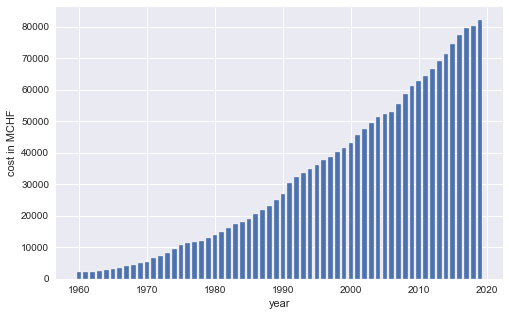

In [33]:
plt.subplots(figsize=(8, 5))
plt.bar(x=df_cost.year, height=df_cost.cost_M, width=0.7)
plt.xlabel('year')
plt.ylabel('cost in MCHF')
plt.style.use("seaborn")
plt.savefig('costMbar.png')
plt.show()

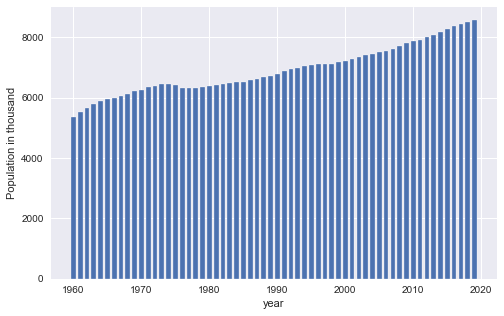

In [22]:
plt.subplots(figsize=(8, 5))
plt.bar(x=df_cost.year, height=df_cost.pop_T, width=0.7)
plt.xlabel('year')
plt.ylabel('Population in thousand')
plt.style.use("seaborn")
plt.savefig('popT.png')
plt.show()

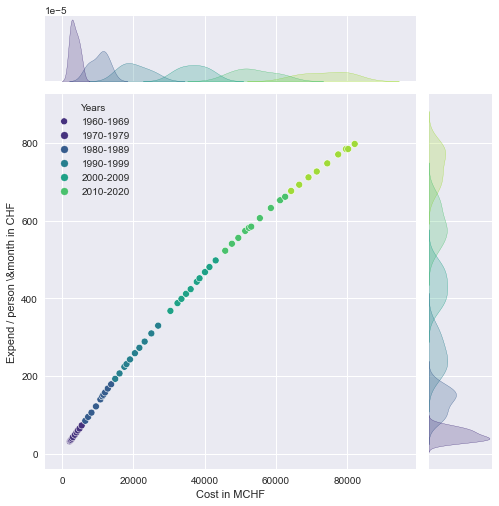

In [37]:
fig = sns.jointplot(x=df_cost.cost_M, y=df_cost.expend_persmonth, kind="scatter", hue=df_cost.year_cat, palette="viridis", height=7)
fig.set_axis_labels("Cost in MCHF", "Expend / person \&month in CHF")
fig.ax_joint.legend(["1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2020"], title="Years")

fig.savefig('Cost_Expend.png')


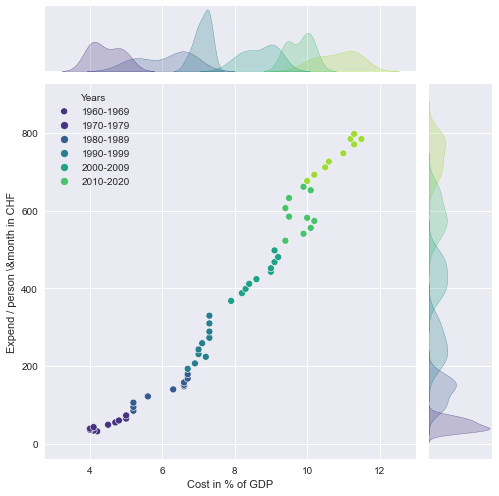

In [25]:
fig = sns.jointplot(data=df_cost, x="cost_%GDP", y="expend_persmonth", kind="scatter", hue="year_cat", palette="viridis",  height=7)
fig.set_axis_labels("Cost in % of GDP", "Expend / person \&month in CHF")
fig.ax_joint.legend(["1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2020"], title="Years")
fig.savefig('Expend_GDP.png')